# Create dummy dataset

active subreddit (categorical)   values (categorical)   succesful (binary)

In [87]:
import pandas as pd
import random

# Define the possible inputs for each column
active_subreddits = [
    "AskReddit",
    "funny",
    "pics",
    "gaming",
    "todayilearned",
    "aww",
    "worldnews",
    "videos",
    "movies",
    "Music",
    "science",
    "books",
    "food",
    "sports",
    "technology",
    "news",
    "television",
    "Art",
    "DIY",
    "memes",
    "travel"
]

values = [
    "Equality",
    "Justice",
    "Freedom",
    "Empathy",
    "Tolerance",
    "Respect",
    "Honesty",
    "Integrity",
    "Compassion",
    "Cooperation",
    "Diversity",
    "Inclusion",
    "Responsibility",
    "Sustainability",
    "Kindness",
    "Fairness",
    "Accountability",
    "Courage",
    "Generosity",
    "Gratitude"
]

# Create an empty list to store the rows
rows = []

# Generate 100 rows
for _ in range(10000):
    active_subreddit = random.choice(active_subreddits)
    value = random.choice(values)
    successful = random.choice([True, False])
    rows.append({'active_subreddit': active_subreddit, 'values': value, 'successful': successful})

# Create the DataFrame
df = pd.DataFrame(rows)

# Print the resulting DataFrame
print(df)


     active_subreddit          values  successful
0              gaming       Gratitude        True
1             science       Tolerance        True
2           AskReddit         Honesty       False
3          television       Inclusion       False
4                 aww         Respect        True
...               ...             ...         ...
9995            funny        Fairness        True
9996              DIY      Generosity        True
9997              aww        Fairness       False
9998            Music  Sustainability       False
9999              Art       Gratitude       False

[10000 rows x 3 columns]


# Descriptive

### Set colors

In [88]:
import matplotlib.pyplot as plt

# Define a custom color palette
color_palette = plt.get_cmap('tab20')

### Frequency of value per category

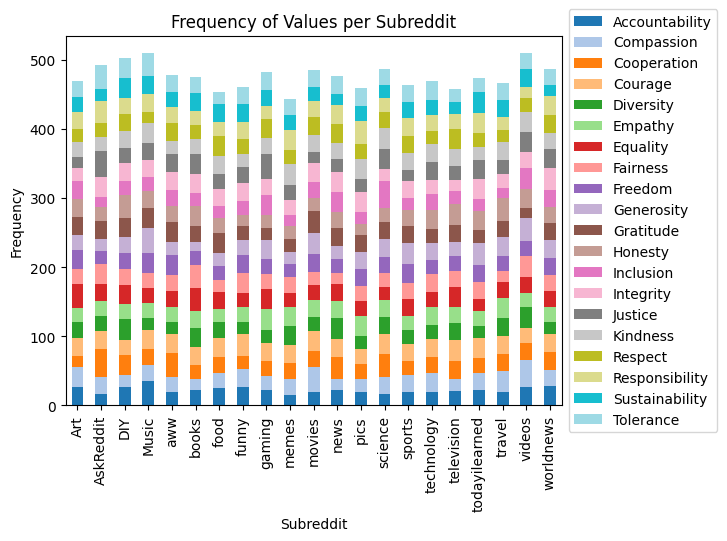

In [89]:

# Count the frequency of values per subreddit
value_counts = df.groupby(['active_subreddit', 'values']).size().unstack(fill_value=0)

# Plot the frequency of values per subreddit
value_counts.plot(kind='bar', stacked=True, colormap=color_palette)


# Move the legend to the right side of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the plot title and axis labels
plt.title('Frequency of Values per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Frequency')

# Display the plot
plt.show()

### Percentage of value per category

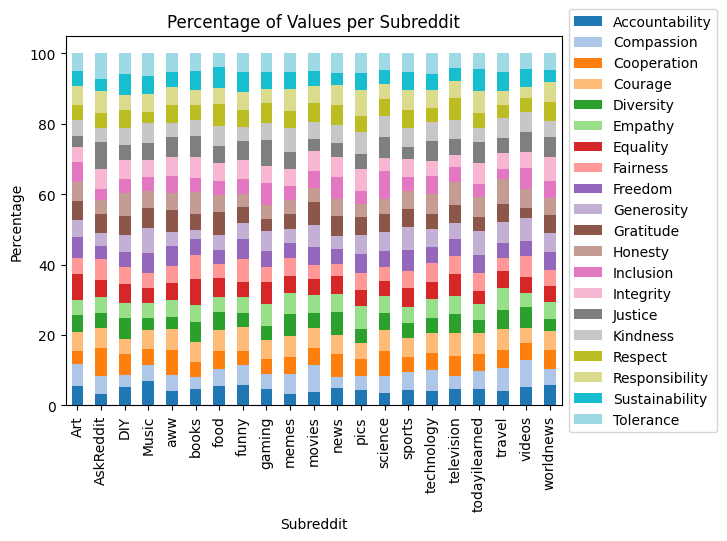

In [90]:
# Calculate the percentage of values per subreddit
value_percentages = df.groupby('active_subreddit')['values'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Plot the percentages of values per subreddit
value_percentages.plot(kind='bar', stacked=True, colormap=color_palette)

# Move the legend to the right side of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the plot title and axis labels
plt.title('Percentage of Values per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Percentage')

# Display the plot
plt.show()


### Frequency of value per succesful or not per category


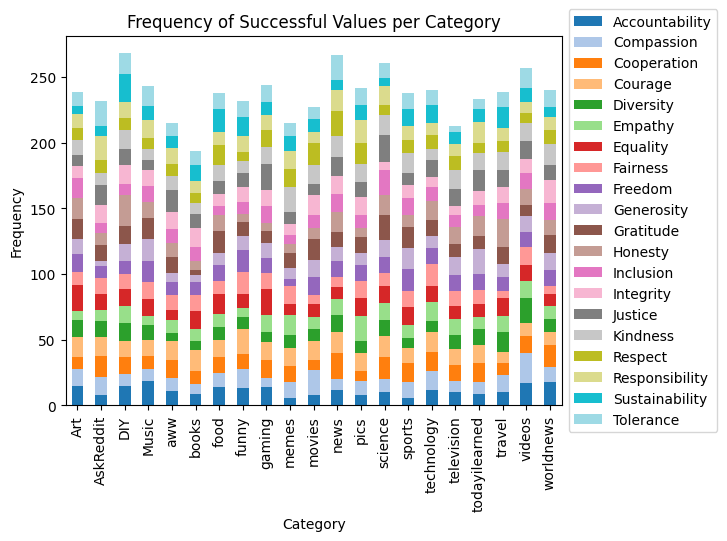

In [91]:
# Group the DataFrame by 'active_subreddit' and 'values', and count the frequency of successful values
success_counts = df[df['successful']].groupby(['active_subreddit', 'values']).size().unstack(fill_value=0)

# Plot the frequency of successful values per category
success_counts.plot(kind='bar', stacked=True, colormap=color_palette)

# Move the legend to the right side of the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the plot title and axis labels
plt.title('Frequency of Successful Values per Category')
plt.xlabel('Category')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### Percentage of values that are succesful per category

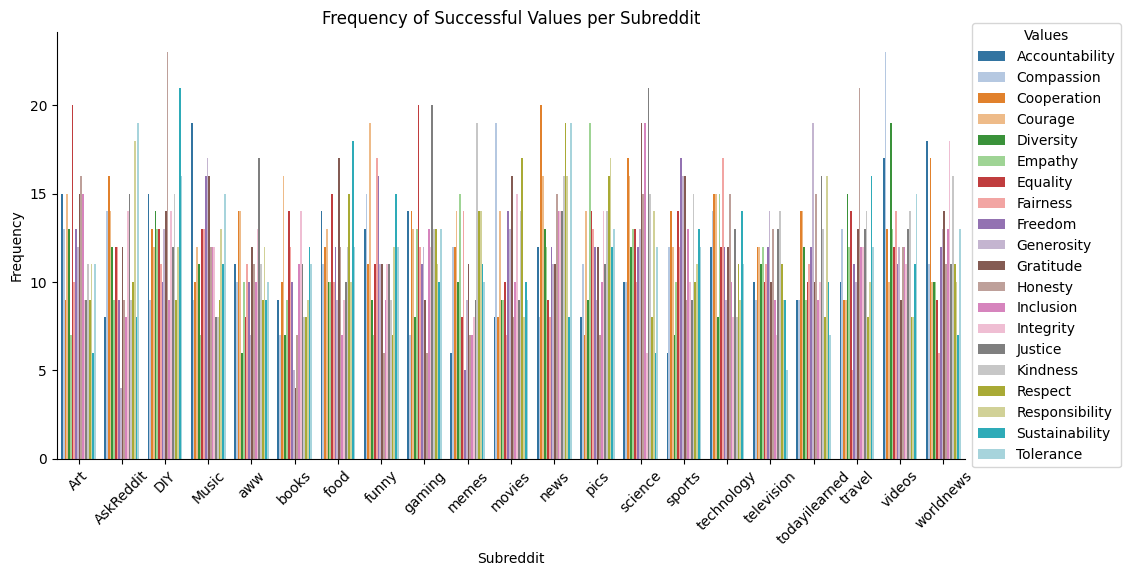

In [92]:
import seaborn as sns

# Filter the DataFrame to include only successful values
successful_df = df[df['successful']]

# Group the filtered DataFrame by 'active_subreddit' and 'values' columns and count the frequency
success_counts = successful_df.groupby(['active_subreddit', 'values']).size().reset_index(name='frequency')

sns_color_palette = sns.color_palette("tab20")

# Plot the grouped bar plot
sns.catplot(x='active_subreddit', y='frequency', hue='values', data=success_counts, kind='bar', legend=False, palette=sns_color_palette, aspect=2)

# Set the plot title and axis labels
plt.title('Frequency of Successful Values per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Frequency')

# Get the unique values of the 'values' column and sort them alphabetically
unique_values = sorted(df['values'].unique())

# Create a new handles and labels list in alphabetical order for the legend
handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles = [handles[labels.index(value)] for value in unique_values]
sorted_labels = [label for label in unique_values]

# Set the legend in alphabetical order
plt.legend(sorted_handles, sorted_labels, title='Values', loc='center left', bbox_to_anchor=(1, 0.5))

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Inferential

The results of the chi-square test provide information about the association between successful values and subreddits. Specifically, the test helps determine if the distribution of (successful) values differs significantly across different subreddits.

The chi-square statistic measures the overall difference between the observed frequencies and the expected frequencies under the assumption of independence. A higher chi-square value indicates a larger deviation from the expected frequencies, suggesting a stronger association between the variables.

The p-value associated with the chi-square statistic indicates the statistical significance of the observed association. A small p-value (typically below a predetermined significance level, such as 0.05) suggests that the observed association is unlikely to have occurred by chance alone. In other words, a small p-value indicates that there is evidence of a significant relationship between successful values and subreddits.

Interpreting the results:

If the chi-square statistic is large and the p-value is small (below the significance level), it suggests that there is a statistically significant association between successful values and subreddits. The variables are likely dependent on each other, and the distribution of successful values differs across subreddits.

If the chi-square statistic is small and the p-value is large (above the significance level), it suggests that there is no strong evidence of an association between successful values and subreddits. The variables may be independent, and any observed differences in the distribution of successful values could be due to random chance.

### Chi square over distribution of values

In [93]:
from scipy.stats import chisquare

# Group the DataFrame by 'active_subreddit' and 'values', and count the frequency
value_counts = df.groupby(['active_subreddit', 'values']).size().unstack(fill_value=0)

# Calculate the chi-square statistic and p-value
chi2, p_value = chisquare(value_counts, axis=None)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square statistic: 379.46
P-value: 0.9174566394990874


### Chi square over distribution of succesful values

In [94]:
# Filter the DataFrame to include only successful values
successful_df = df[df['successful']]

# Group the filtered DataFrame by 'active_subreddit' and 'values', and count the frequency
value_counts = successful_df.groupby(['active_subreddit', 'values']).size().unstack(fill_value=0)

# Calculate the chi-square statistic and p-value
chi2, p_value = chisquare(value_counts, axis=None)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square statistic: 395.91139240506334
P-value: 0.7851142321915332


# Correlation

Correlation Matrix:
                Accountability  Compassion  Cooperation   Courage  Diversity   
Accountability        1.000000   -0.051265    -0.052216 -0.053875  -0.049428  \
Compassion           -0.051265    1.000000    -0.054399 -0.056127  -0.051494   
Cooperation          -0.052216   -0.054399     1.000000 -0.057169  -0.052450   
Courage              -0.053875   -0.056127    -0.057169  1.000000  -0.054116   
Diversity            -0.049428   -0.051494    -0.052450 -0.054116   1.000000   
Empathy              -0.050623   -0.052739    -0.053718 -0.055424  -0.050849   
Equality             -0.051318   -0.053463    -0.054456 -0.056186  -0.051547   
Fairness             -0.050136   -0.052232    -0.053202 -0.054892  -0.050360   
Freedom              -0.050299   -0.052401    -0.053374 -0.055070  -0.050524   
Generosity           -0.051371   -0.053519    -0.054512 -0.056244  -0.051601   
Gratitude            -0.051105   -0.053241    -0.054229 -0.055952  -0.051333   
Honesty             

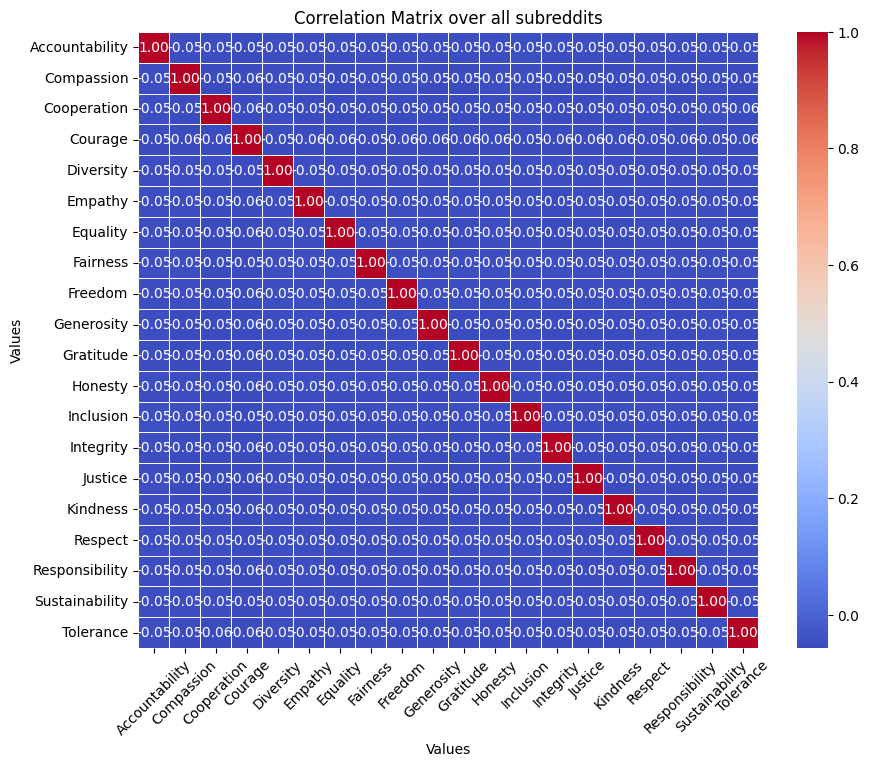

In [95]:
# correlation efficient between pairs of values: expressed together or mutually exclusive?

# Calculate the correlation coefficient between pairs of values
correlation_matrix = df['values'].str.get_dummies().corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix over all subreddits')
plt.xlabel('Values')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

